# Calidad de los datos para tabla Players

## 0. Librerias

In [66]:
import sqlite3
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Extraccion de los datos

In [67]:
tabla = 'Team_Attributes'

In [68]:
conn = sqlite3.connect('database.sqlite')
data = pd.read_sql_query(f"SELECT * FROM {tabla}", conn)

In [69]:
data.shape

(1458, 25)

In [70]:
data.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [71]:
data.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

## 1.1. Columnas numericas 

In [72]:
#number_cols = data.dtypes[(data.dtypes == np.int64) | (data.dtypes == np.float64)].index
integer_cols = data.select_dtypes(include = ['int']).columns
float_cols = data.select_dtypes(include = ['float']).columns

number_cols = data.select_dtypes(include = ['int','float']).columns
number_cols 

Index(['id', 'team_fifa_api_id', 'team_api_id', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth'],
      dtype='object')

In [73]:
data[number_cols].describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


## 1.2. Columnas categoricas 

In [74]:
#non_number_cols = data.columns.difference(number_cols) 
#non_number_cols = data.dtypes[(data.dtypes != np.int64) & (data.dtypes != np.float64)].index 

object_cols = data.select_dtypes(include = ['object']).columns
boolean_cols = data.select_dtypes(include = ['bool']).columns
date_cols = data.select_dtypes(include = ['datetime']).columns

non_number_cols = data.select_dtypes(include = ['object','bool','datetime']).columns
non_number_cols

Index(['date', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassingClass', 'chanceCreationCrossingClass',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressureClass', 'defenceAggressionClass',
       'defenceTeamWidthClass', 'defenceDefenderLineClass'],
      dtype='object')

In [75]:
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors = 'coerce')
    data[date_cols].head(3)

In [76]:
data["date"] = pd.to_datetime(data["date"], errors = 'coerce')

data["date"].head()

0   2010-02-22
1   2014-09-19
2   2015-09-10
3   2010-02-22
4   2011-02-22
Name: date, dtype: datetime64[ns]

In [77]:
data[non_number_cols].head()

,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,2010-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,2015-09-10,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,2010-02-22,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover


## 1.3 Correlacion

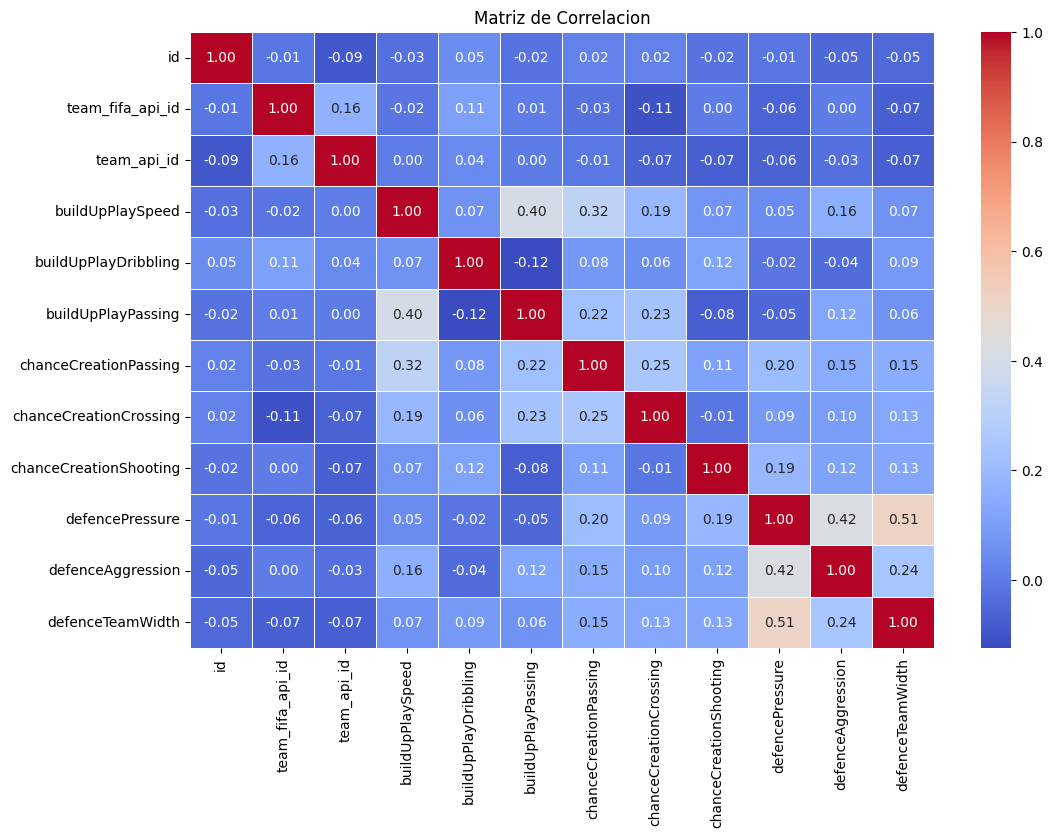

In [78]:
import numpy as np

matriz_correlaciones = data[number_cols].corr()

mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=None, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

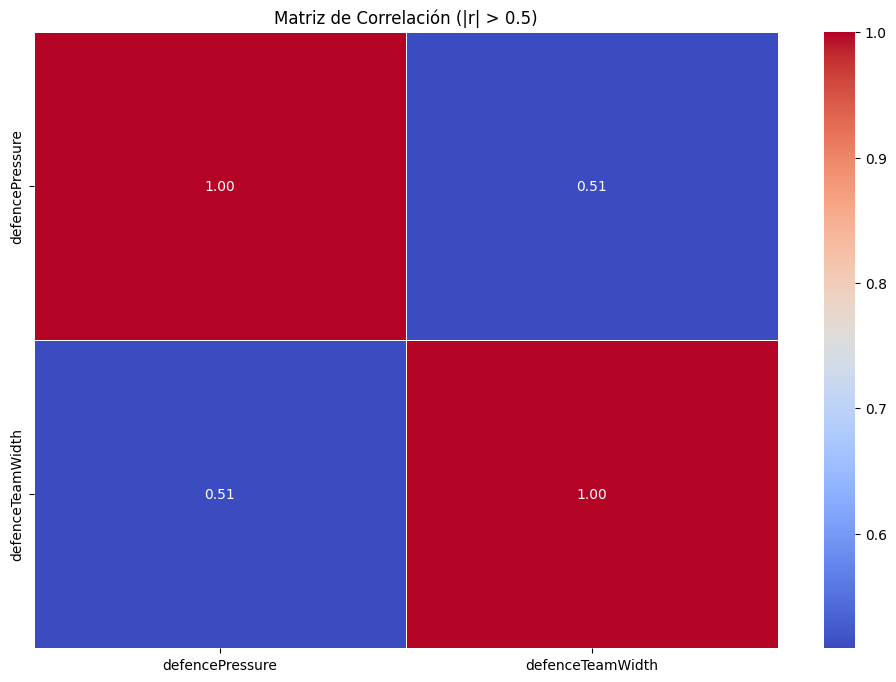

In [79]:
# Seleccionar pares con correlación fuerte (mayor a 0.8 y menor a 1 para evitar la diagonal)
umbral = 0.5
mask_fuerte = (matriz_correlaciones.abs() > umbral) & (matriz_correlaciones.abs() < 1)

# Variables que cumplen la condición
vars_fuerte = mask_fuerte.any(axis=1)
vars_seleccionadas = matriz_correlaciones.columns[vars_fuerte]

matriz_filtrada = matriz_correlaciones.loc[vars_seleccionadas, vars_seleccionadas]

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_filtrada, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title(f"Matriz de Correlación (|r| > {umbral})")
plt.show()


In [80]:
data.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [81]:
corr_pairs = (
    matriz_correlaciones.where(np.triu(np.ones(matriz_correlaciones.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Variable_1", "Variable_2", "Correlación"]

# Filtrar por el umbral
corr_filtradas = corr_pairs[corr_pairs["Correlación"] > umbral].sort_values(by="Correlación", ascending=False)

corr_filtradas

,Variable_1,Variable_2,Correlación
64,defencePressure,defenceTeamWidth,0.508464


# 2. Calidad de los datos

In [82]:
data_t = data.copy()
data_t.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## 2.1. Completitud

In [83]:
data_t.isnull().sum().sort_values(ascending=False).head(10)

buildUpPlayDribbling         969
id                             0
team_fifa_api_id               0
date                           0
team_api_id                    0
buildUpPlaySpeed               0
buildUpPlaySpeedClass          0
buildUpPlayDribblingClass      0
buildUpPlayPassing             0
buildUpPlayPassingClass        0
dtype: int64

In [84]:
print("Porcentage nulos por columna: ")
(100* data_t.isnull().sum()/data_t.shape[0]).sort_values(ascending=False).head(10)

Porcentage nulos por columna: 


buildUpPlayDribbling         66.460905
id                            0.000000
team_fifa_api_id              0.000000
date                          0.000000
team_api_id                   0.000000
buildUpPlaySpeed              0.000000
buildUpPlaySpeedClass         0.000000
buildUpPlayDribblingClass     0.000000
buildUpPlayPassing            0.000000
buildUpPlayPassingClass       0.000000
dtype: float64

In [85]:
print("Numero de reguistros por ccada proporcion de nulos:")
(data_t.isnull().sum(axis=1) / data_t.shape[1]).value_counts().head()



Numero de reguistros por ccada proporcion de nulos:


0.04    969
0.00    489
Name: count, dtype: int64

In [86]:
num_filas_con_nulos = data_t.isnull().any(axis=1).sum()
print(f"Número de registros con al menos un nulo: {num_filas_con_nulos}")


Número de registros con al menos un nulo: 969


In [87]:
porcentaje_filas_con_nulos = (data_t.isnull().any(axis=1).sum()/data_t.shape[0]) * 100
print(f"Porcentaje de registros con al menos un nulo: {porcentaje_filas_con_nulos:.2f}%")

Porcentaje de registros con al menos un nulo: 66.46%


In [88]:
cols_con_nulos = data_t.columns[data_t.isnull().any()]
print(cols_con_nulos)
print({f"Columnas en total: {data_t.shape[1]}"})
print({f"Columnas con nulos: {cols_con_nulos.shape[0]}"})


Index(['buildUpPlayDribbling'], dtype='object')
{'Columnas en total: 25'}
{'Columnas con nulos: 1'}


In [89]:
data_t = data_t.dropna()

In [90]:
for col in number_cols:
    data_t[col].fillna(data_t[col].mean())

In [91]:
data_t.isnull().sum().sort_values(ascending=False).head()

id                  0
team_fifa_api_id    0
team_api_id         0
date                0
buildUpPlaySpeed    0
dtype: int64

## 2.2. Unicidad

In [92]:
for col in non_number_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

date: 487
buildUpPlaySpeedClass: 486
buildUpPlayDribblingClass: 486
buildUpPlayPassingClass: 486
buildUpPlayPositioningClass: 487
chanceCreationPassingClass: 486
chanceCreationCrossingClass: 486
chanceCreationShootingClass: 486
chanceCreationPositioningClass: 487
defencePressureClass: 486
defenceAggressionClass: 486
defenceTeamWidthClass: 486
defenceDefenderLineClass: 487


In [93]:
data_t.duplicated(keep=False).sum()

np.int64(0)

In [94]:
data_t.loc[data_t.duplicated(keep=False)]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass


In [95]:
for col in number_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"Valores duplicados para la columna {col}: {num_duplicated}")

Valores duplicados para la columna id: 0
Valores duplicados para la columna team_fifa_api_id: 229
Valores duplicados para la columna team_api_id: 227
Valores duplicados para la columna buildUpPlaySpeed: 439
Valores duplicados para la columna buildUpPlayDribbling: 440
Valores duplicados para la columna buildUpPlayPassing: 435
Valores duplicados para la columna chanceCreationPassing: 442
Valores duplicados para la columna chanceCreationCrossing: 439
Valores duplicados para la columna chanceCreationShooting: 437
Valores duplicados para la columna defencePressure: 445
Valores duplicados para la columna defenceAggression: 446
Valores duplicados para la columna defenceTeamWidth: 450


In [100]:
cols = [c for c in data_t.columns if c != "id"]
dup_mask = data_t.duplicated(subset=cols, keep=False)
duplicados = data_t[dup_mask].sort_values(by=cols)
duplicados


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
859,860,111560,9996,2015-09-10,50,Balanced,50.0,Normal,50,Mixed,...,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover
860,861,111560,9996,2015-09-10,50,Balanced,50.0,Normal,50,Mixed,...,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover


In [96]:
print(f"Porcentage de duplicados: {data_t.duplicated(keep=False).sum() / data.shape[0] * 100:.2f}%")

Porcentage de duplicados: 0.00%


In [97]:
data_t.drop_duplicates(keep = 'first', inplace = True)

In [98]:
data_t.duplicated(keep=False).sum()

np.int64(0)

## 2.3. Consistencia

In [101]:
for col in object_cols:
    print(f"Value counts for column: {col}")
    print(data.value_counts(col))
    print("\n")

Value counts for column: date
date
2015-09-10    245
2011-02-22    244
2014-09-19    244
2013-09-20    242
2012-02-22    242
2010-02-22    241
Name: count, dtype: int64


Value counts for column: buildUpPlaySpeedClass
buildUpPlaySpeedClass
Balanced    1184
Fast         172
Slow         102
Name: count, dtype: int64


Value counts for column: buildUpPlayDribblingClass
buildUpPlayDribblingClass
Little    1004
Normal     433
Lots        21
Name: count, dtype: int64


Value counts for column: buildUpPlayPassingClass
buildUpPlayPassingClass
Mixed    1236
Short     128
Long       94
Name: count, dtype: int64


Value counts for column: buildUpPlayPositioningClass
buildUpPlayPositioningClass
Organised    1386
Free Form      72
Name: count, dtype: int64


Value counts for column: chanceCreationPassingClass
chanceCreationPassingClass
Normal    1231
Risky      171
Safe        56
Name: count, dtype: int64


Value counts for column: chanceCreationCrossingClass
chanceCreationCrossingClass
Normal    

In [ ]:
data_t.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## 2.4. Validez

In [ ]:
data.dtypes

id                              int64
player_fifa_api_id              int64
player_api_id                   int64
date                   datetime64[ns]
overall_rating                float64
potential                     float64
preferred_foot                 object
attacking_work_rate            object
defensive_work_rate            object
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina     